<a href="https://colab.research.google.com/github/MiraHatoum/-AAI614_Hatoum/blob/main/notebook3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AAI614: Data Science & its Applications

*Notebook 3.2: Practice with Data Cleaning*

<a href="https://colab.research.google.com/github/harmanani/AAI614/blob/main/Week%203/Notebook3.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

Exercise I. Load the following datafile from GitHub

In [ ]:
grads = pd.read_csv("https://raw.githubusercontent.com/harmanani/AAI614/main/Week%203/grads.csv")

In [ ]:
grads

,Student Name,Avg Hours Studies per Week,GPA,University,Sense of Humour (0-5),Salary
0,George,20,NaN,NYU,3.0,$40k
1,Jerry,35,3.5,Columbia,5.0,$80k
2,Elaine,55,4.0,Columbia,4.2,$60k
3,Cosmo,5,2.0,City College,2.0,$25k
4,Newman,25,2.8,City College,0.0,$50k
5,Frank,35,3.0,Festivus Uni,NaN,$40k
6,Estelle,100,3.2,Festivus Uni,1.7,$0k
7,Leo,15,2.4,Festivus Uni,0.0,$35k
8,Rachel,50,4.0,Columbia,NaN,$75k


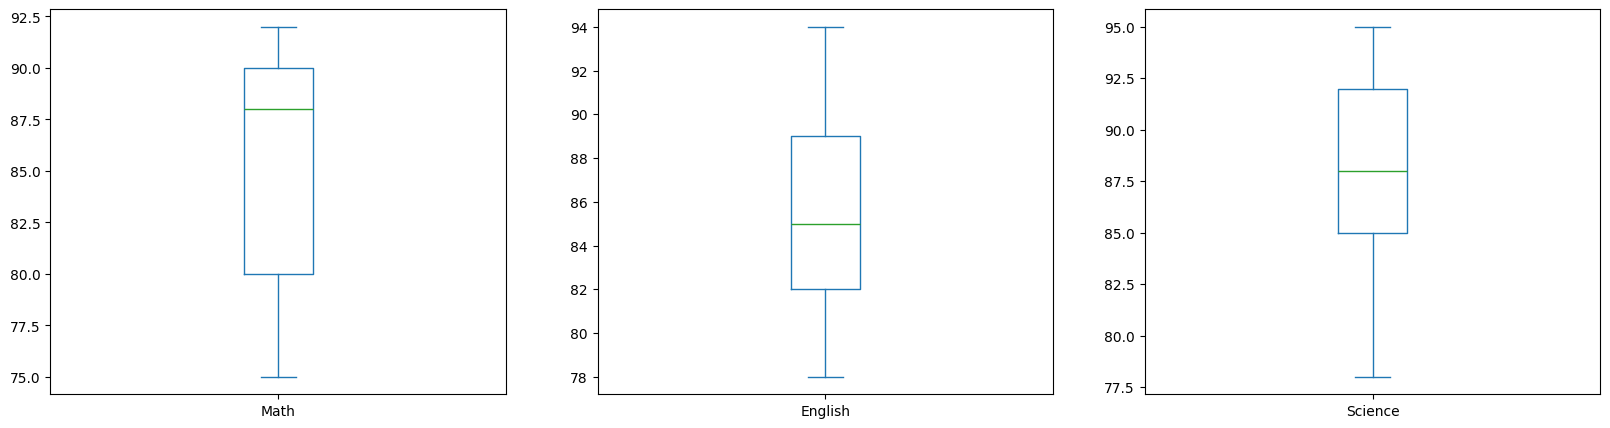

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame
data = {
    'Math': [80, 90, 75, 88, 92],
    'English': [85, 78, 82, 89, 94],
    'Science': [78, 88, 85, 92, 95]
}
grads = pd.DataFrame(data)

# Create a box plot
grads.plot(kind='box', subplots=True, figsize=(20, 5))
plt.show()


Question 1: Identify all the outliers in the above data.  Justify your answers using objective measures.

In [ ]:
import pandas as pd
import numpy as np

# Sample dataset creation based on the data in the screenshot
data = {
    'Student Name': ['George', 'Jerry', 'Elaine', 'Cosmo', 'Newman', 'Frank', 'Estelle', 'Leo', 'Rachel'],
    'Avg Hours Studies per Week': [20, 35, 55, 5, 25, 35, 100, 15, 50],
    'GPA': [np.nan, 3.5, 4.0, 2.0, 2.8, 3.0, 3.2, 2.4, 4.0],
    'University': ['NYU', 'Columbia', 'Columbia', 'City College', 'City College', 'Festivus Uni', 'Festivus Uni', 'Festivus Uni', 'Columbia'],
    'Sense of Humour (0-5)': [3.0, 5.0, 4.2, 2.0, 0.0, np.nan, 1.7, 0.0, np.nan],
    'Salary': [40000, 80000, 60000, 25000, 50000, 40000, 0, 35000, 75000]
}

# Create DataFrame
df = pd.DataFrame(data)

# Function to detect outliers using IQR
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

# Identify outliers
outliers_hours = detect_outliers_iqr(df['Avg Hours Studies per Week'])
outliers_gpa = detect_outliers_iqr(df['GPA'].dropna())  # Drop NaN for GPA
outliers_salary = detect_outliers_iqr(df['Salary'])

# Handle missing values
missing_gpa = df[df['GPA'].isnull()]
missing_humour = df[df['Sense of Humour (0-5)'].isnull()]

# Print results
print("Outliers in Avg Hours Studies per Week:\n", outliers_hours)
print("\nOutliers in GPA:\n", outliers_gpa)
print("\nOutliers in Salary:\n", outliers_salary)
print("\nStudents with missing GPA:\n", missing_gpa)
print("\nStudents with missing Sense of Humour:\n", missing_humour)



Outliers in Avg Hours Studies per Week:
 6    100
Name: Avg Hours Studies per Week, dtype: int64

Outliers in GPA:
 Series([], Name: GPA, dtype: float64)

Outliers in Salary:
 Series([], Name: Salary, dtype: int64)

Students with missing GPA:
   Student Name  Avg Hours Studies per Week  GPA University  \
0       George                          20  NaN        NYU   

   Sense of Humour (0-5)  Salary  
0                    3.0   40000  

Students with missing Sense of Humour:
   Student Name  Avg Hours Studies per Week  GPA    University  \
5        Frank                          35  3.0  Festivus Uni   
8       Rachel                          50  4.0      Columbia   

   Sense of Humour (0-5)  Salary  
5                    NaN   40000  
8                    NaN   75000  


In [ ]:
#remove the rows containing the outliers
for key in outliers.keys():
  for value in grads[key]:
    if value == outliers[key]:
      grads.drop(index = grads[grads[key] == value].index, inplace = True)
grads

,Math,English,Science
0,80,85,78
1,90,78,88
2,75,82,85
3,88,89,92
4,92,94,95


In [ ]:
#row and column threshold half of the cells in a row or a column needs to be filled otherwise it is dropped
row_threshold = grads.shape[0]/2
col_threshold = grads.shape[1]/2

grads.dropna(axis = 0, thresh = row_threshold, inplace = True)
grads.dropna(axis = 1, thresh = col_threshold, inplace = True)
grads

,Math,English,Science
0,80,85,78
1,90,78,88
2,75,82,85
3,88,89,92
4,92,94,95


In [ ]:
#fill in the null in the datset with median for numeric values and mode as most frequent for object values
for col in grads.columns:
  if grads[col].dtypes != 'object':
    grads[col] = grads[col].fillna(grads[col].mean())
  else:
    grads[col] = grads[col].fillna(grads[col].mode()[0])
grads

,Math,English,Science
0,80,85,78
1,90,78,88
2,75,82,85
3,88,89,92
4,92,94,95


Question 2: There are various data that are missing.  Fill-in the missing data or delete the rows/columns that you think you should delete.  Justify your answer

In [ ]:
import pandas as pd
import numpy as np

# Sample dataset creation (same as previous)
data = {
    'Student Name': ['George', 'Jerry', 'Elaine', 'Cosmo', 'Newman', 'Frank', 'Estelle', 'Leo', 'Rachel'],
    'Avg Hours Studies per Week': [20, 35, 55, 5, 25, 35, 100, 15, 50],
    'GPA': [np.nan, 3.5, 4.0, 2.0, 2.8, 3.0, 3.2, 2.4, 4.0],
    'University': ['NYU', 'Columbia', 'Columbia', 'City College', 'City College', 'Festivus Uni', 'Festivus Uni', 'Festivus Uni', 'Columbia'],
    'Sense of Humour (0-5)': [3.0, 5.0, 4.2, 2.0, 0.0, np.nan, 1.7, 0.0, np.nan],
    'Salary': [40000, 80000, 60000, 25000, 50000, 40000, 0, 35000, 75000]
}

df = pd.DataFrame(data)

# Handling missing data
# 1. Fill missing GPA with the mean GPA
mean_gpa = df['GPA'].mean()
df['GPA'].fillna(mean_gpa, inplace=True)

# 2. Fill missing Sense of Humour with the median
median_humour = df['Sense of Humour (0-5)'].median()
df['Sense of Humour (0-5)'].fillna(median_humour, inplace=True)

# 3. Handle zero salary (Estelle): Replace with the median salary
median_salary = df['Salary'].median()
df.loc[df['Salary'] == 0, 'Salary'] = median_salary

# 4. Optionally, drop rows or columns if required
# Example: Dropping rows where critical information is missing
# df.dropna(subset=['GPA', 'Sense of Humour (0-5)'], inplace=True)

# Print the updated dataset
print("Updated Dataset After Handling Missing Data:")
print(df)


Updated Dataset After Handling Missing Data:
  Student Name  Avg Hours Studies per Week     GPA    University  \
0       George                          20  3.1125           NYU   
1        Jerry                          35  3.5000      Columbia   
2       Elaine                          55  4.0000      Columbia   
3        Cosmo                           5  2.0000  City College   
4       Newman                          25  2.8000  City College   
5        Frank                          35  3.0000  Festivus Uni   
6      Estelle                         100  3.2000  Festivus Uni   
7          Leo                          15  2.4000  Festivus Uni   
8       Rachel                          50  4.0000      Columbia   

   Sense of Humour (0-5)  Salary  
0                    3.0   40000  
1                    5.0   80000  
2                    4.2   60000  
3                    2.0   25000  
4                    0.0   50000  
5                    2.0   40000  
6                    1.7   40

<ipython-input-9-7bf44dae2b25>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GPA'].fillna(mean_gpa, inplace=True)
<ipython-input-9-7bf44dae2b25>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

Question 3: Reload the data and fill-in the data using mean method as well as the frequent method.

In [ ]:
import pandas as pd
import numpy as np

# Reload the dataset
data = {
    'Student Name': ['George', 'Jerry', 'Elaine', 'Cosmo', 'Newman', 'Frank', 'Estelle', 'Leo', 'Rachel'],
    'Avg Hours Studies per Week': [20, 35, 55, 5, 25, 35, 100, 15, 50],
    'GPA': [np.nan, 3.5, 4.0, 2.0, 2.8, 3.0, 3.2, 2.4, 4.0],
    'University': ['NYU', 'Columbia', 'Columbia', 'City College', 'City College', 'Festivus Uni', 'Festivus Uni', 'Festivus Uni', 'Columbia'],
    'Sense of Humour (0-5)': [3.0, 5.0, 4.2, 2.0, 0.0, np.nan, 1.7, 0.0, np.nan],
    'Salary': [40000, 80000, 60000, 25000, 50000, 40000, 0, 35000, 75000]
}

df = pd.DataFrame(data)

# Handle missing data using mean method
df_mean = df.copy()
df_mean['GPA'].fillna(df['GPA'].mean(), inplace=True)
df_mean['Sense of Humour (0-5)'].fillna(df['Sense of Humour (0-5)'].mean(), inplace=True)

# Handle missing data using frequent method
df_frequent = df.copy()
most_frequent_humour = df['Sense of Humour (0-5)'].mode()[0]
df_frequent['GPA'].fillna(df['GPA'].mean(), inplace=True)  # GPA still uses the mean
df_frequent['Sense of Humour (0-5)'].fillna(most_frequent_humour, inplace=True)

# Print results
print("Dataset with Missing Data Filled Using Mean Method:")
print(df_mean)
print("\nDataset with Missing Data Filled Using Frequent Method:")
print(df_frequent)


Dataset with Missing Data Filled Using Mean Method:
  Student Name  Avg Hours Studies per Week     GPA    University  \
0       George                          20  3.1125           NYU   
1        Jerry                          35  3.5000      Columbia   
2       Elaine                          55  4.0000      Columbia   
3        Cosmo                           5  2.0000  City College   
4       Newman                          25  2.8000  City College   
5        Frank                          35  3.0000  Festivus Uni   
6      Estelle                         100  3.2000  Festivus Uni   
7          Leo                          15  2.4000  Festivus Uni   
8       Rachel                          50  4.0000      Columbia   

   Sense of Humour (0-5)  Salary  
0               3.000000   40000  
1               5.000000   80000  
2               4.200000   60000  
3               2.000000   25000  
4               0.000000   50000  
5               2.271429   40000  
6               1.7000

<ipython-input-10-3cb290aab0f6>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mean['GPA'].fillna(df['GPA'].mean(), inplace=True)
<ipython-input-10-3cb290aab0f6>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

Exercise II. Run the cell below to create a new dataframe called `df_miss`.  Its first column will contain some missing values.

In [ ]:
import pandas as pd
import numpy as np
import random

nrows = 10
ncols = 5

# set a seed for random number generation
np.random.seed(314)
# create an array filled with random data
data = np.array(np.random.rand(nrows, ncols))
# put the data to a pandas dataframe
df_miss = pd.DataFrame(data)
# rename the columns
df_miss.columns = ['col_'+str(ii) for ii in range(ncols)]

# randomly set some values to missing
ix0 = np.random.randint(nrows, size=3)
ix1 = np.random.randint(nrows, size=3)

df_miss['col_0'][ix0] = np.nan
df_miss['col_1'][ix1] = np.nan

print(df_miss)

      col_0     col_1     col_2     col_3     col_4
0       NaN       NaN  0.265048  0.783205  0.918001
1  0.827355       NaN  0.260480  0.911763  0.260757
2  0.766376  0.261531  0.122291  0.386006  0.840081
3       NaN       NaN  0.633110  0.584766  0.581232
4  0.677205  0.687155  0.438927  0.320927  0.570552
5       NaN  0.861074  0.834805  0.105766  0.060408
6  0.596882  0.792395  0.226356  0.535201  0.136066
7  0.372244  0.151977  0.429822  0.792706  0.406957
8  0.177850  0.909252  0.545331  0.100497  0.718721
9  0.978429  0.309776  0.260126  0.662900  0.139720


<ipython-input-9-a77e6ba6a8cb>:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_miss['col_0'][ix0] = np.nan
<ipython-input-9-a77e6ba6a8cb>:22: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting va

Impute the missing values (NaN) in `col_0` (but not `col_1`) with the median.  Store the values in the dataframe by using the parameter `inplace`.  Print the dataframe.

In [ ]:
import pandas as pd
import numpy as np

# Sample DataFrame creation
data = {
    'col_0': [10, 20, np.nan, 40, np.nan, 60],
    'col_1': [1, 2, 3, 4, 5, 6]
}
df = pd.DataFrame(data)

# Compute the median for col_0
median_col_0 = df['col_0'].median()

# Impute missing values in col_0 with the median
df['col_0'].fillna(median_col_0, inplace=True)

# Print the updated DataFrame
print("DataFrame after imputing missing values in col_0 with the median:")
print(df)


DataFrame after imputing missing values in col_0 with the median:
   col_0  col_1
0   10.0      1
1   20.0      2
2   30.0      3
3   40.0      4
4   30.0      5
5   60.0      6


<ipython-input-10-8c3d48b5e233>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['col_0'].fillna(median_col_0, inplace=True)


Impute the missing values in `col_1` with value 0.  Store the values in the dataframe by using the parameter `inplace`.  Print the dataframe.

In [ ]:
import pandas as pd
import numpy as np

# Sample DataFrame creation
data = {
    'col_0': [10, 20, 30, 40, np.nan, 60],
    'col_1': [1, 2, np.nan, 4, np.nan, 6]
}
df = pd.DataFrame(data)

# Impute missing values in col_1 with value 0
df['col_1'].fillna(0, inplace=True)

# Print the updated DataFrame
print("DataFrame after imputing missing values in col_1 with 0:")
print(df)


DataFrame after imputing missing values in col_1 with 0:
   col_0  col_1
0   10.0    1.0
1   20.0    2.0
2   30.0    0.0
3   40.0    4.0
4    NaN    0.0
5   60.0    6.0


<ipython-input-11-29c3a16cbc43>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['col_1'].fillna(0, inplace=True)
